In [1]:
# This will force external files to be reloaded
%load_ext autoreload
%autoreload 2
import utils.rootprint
import utils.rootnotes
from array import array

from utils.plotting import *

from ROOT import TFile, TH1F, TCanvas, TLegend, TGraphErrors
import math
from itertools import chain

In [162]:
# base_dir = "/Users/demattia/RemoteProjects/LinearizedTrackFit/LinearizedTrackFit/python/ConstantsProduction/"

# fit_type = "Combinations_Transverse_SecondOrder_2_10/"
# fit_type = "Combinations_Transverse_SecondOrder_20_more/"
# fit_type = "PreEstimate_Transverse/"
# fit_type = "Combinations_Transverse_SecondOrder_ExtrapolatedRSecondOrderNonRadialStripCorrectionLookup_10_more"

# fit_type = "PreEstimate_Transverse/Test/"
# fit_type = "PreEstimate_Transverse_10_more/Test"
# fit_type = "PreEstimate_Transverse_10_more_flatPt"

base_dir = "/Users/demattia/RemoteProjects/Test/"
fit_type = ""


# input_file_name = base_dir+fit_type+"linearFitterHistograms.root"

# input_file_name = "/Users/demattia/RemoteProjects/Test/fullLinearFitterHistograms.root"

# Minuit fitter
# input_file_name = "/Users/demattia/RemoteProjects/Test/fullMinuitFitterHistograms.root"


file_name_list, legend_entry_list = generate_files_and_legend_entry_all_regions_6_6(base_dir, fit_type)


region = 10


input_file_name = file_name_list[region-1]

## Pt Bias and Resolution

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c1
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c2
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: Resolutions


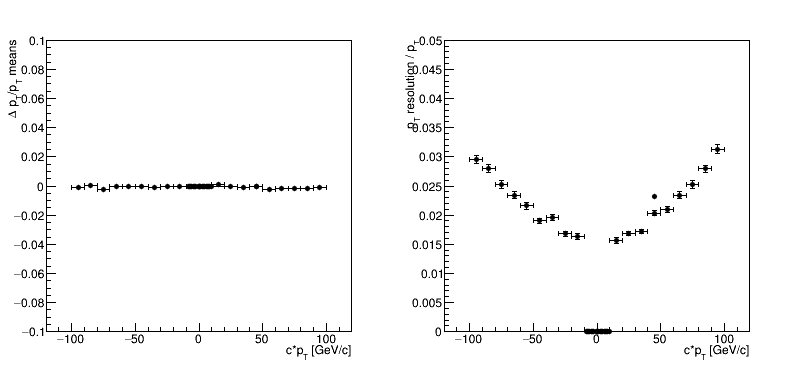

In [163]:
total_bins = 400
pt_bin_edge = []
min_x = -0.05
max_x = 0.05
# pt_min = -10.
# pt_max = 10.
# pt_bin_edge = [n for n in chain(range(-10, -1), range(2, 11))]

# Full pt range
pt_min = -200.
pt_max = 200.
# pt_bin_edge = [n for n in chain(range(-200, -1), range(2, 201))]
# pt_bin_edge = [10*n for n in chain(range(-20, -2), range(2, 21))]+[n for n in chain(range(-20, -1), range(2, 21))]
pt_bin_edge = [10*n for n in chain(range(-10, 0), range(1, 11))]+[n for n in chain(range(-9, -1), range(1, 11))]

o = fit_slices(input_file_name, "deltaPtOverPtVsPt", pt_bin_edge, pt_min, pt_max, total_bins,
               2*min_x, 2*max_x, 0., 0.05,
               "c*p_{T} [GeV/c]", "#Delta p_{T}/p_{T}", "p_{T} resolution / p_{T}")
o[2]

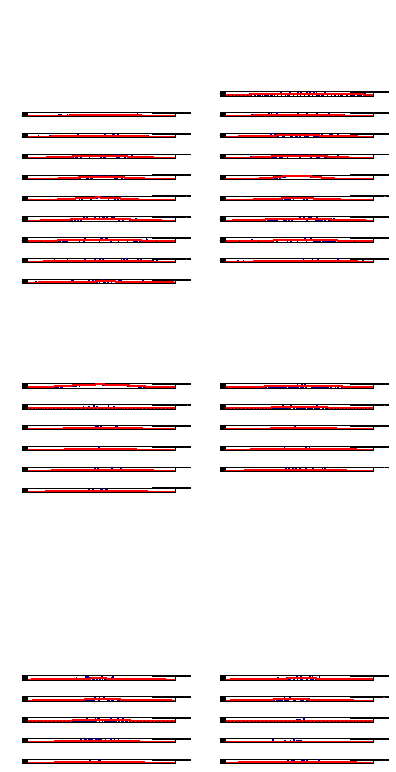

In [79]:
o[1]

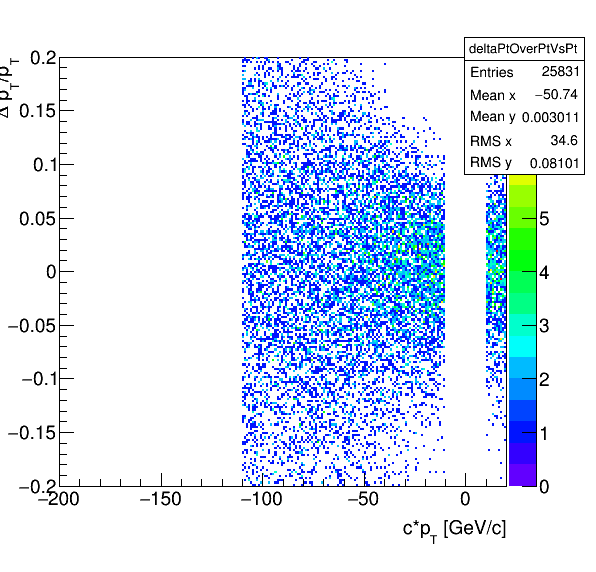

In [80]:
o[0]

In [81]:
c = TCanvas("c", "c", 600, 600)
o[3].Draw("APE")
o[3].Fit("pol1")
func = o[3].GetFunction("pol1");
func.Draw("same")
p0 = func.GetParameter(0);
p1 = func.GetParameter(1);
c
# print p0
# print p1
c.SaveAs("fit.root")

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


## 1/Pt Bias and Resolution

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c1
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c2
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: Resolutions


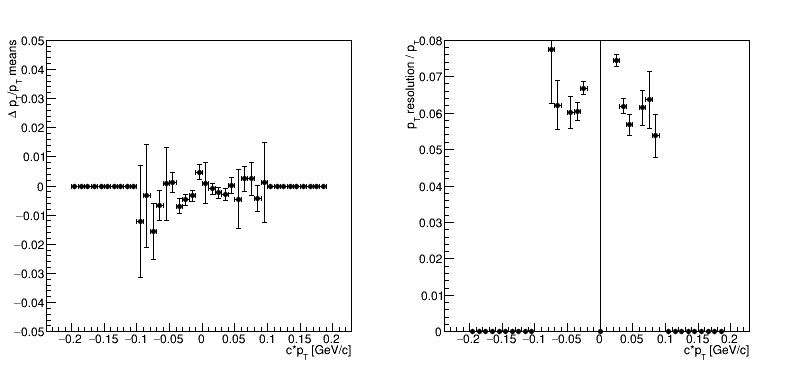

In [82]:
# curvature_bin_edge = [n/200. for n in chain(range(-3, 0), range(-1, 3))]
curvature_bin_edge = [n/100. for n in range(-20, 20)]

oc = fit_slices(input_file_name, "deltaCurvatureOverCurvatureVsCurvature", curvature_bin_edge,
                -0.6, 0.6, 240,
                min_x, max_x, 0., 0.08,
               "c*p_{T} [GeV/c]", "#Delta p_{T}/p_{T}", "p_{T} resolution / p_{T}")

oc[2]

In [83]:
# oc[1]

In [84]:
# oc[0]

## Phi Bias and Resolution

In [85]:
min_x_phi = -0.001
max_x_phi = 0.001
# min_x_phi = -0.01
# max_x_phi = 0.01
ophi = fit_slices(input_file_name, "deltaPhiVsPt", pt_bin_edge, pt_min, pt_max, total_bins,
                   min_x_phi, max_x_phi, 0., 0.002,
#                   10*min_x_phi, 10*max_x_phi, 0., 0.01,
                  "c*p_{T} [GeV/c]", "#Delta#phi", "#Delta#phi sigmas")
ophi[2]

AttributeError: 'TObject' object has no attribute 'SetTitle'

In [86]:
ophi[1]

None

In [87]:
ophi[0]

None

## $\chi^2/ndof$

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c_chi2Ndof


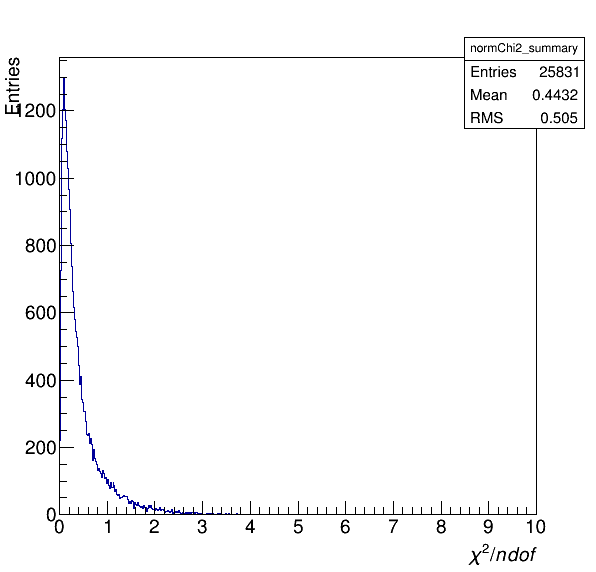

In [88]:
c_chi2Ndof = draw_chi2ndof(input_file_name)
c_chi2Ndof[0]

##Z Bias and Resolution

In [89]:
z0_min = -20.
z0_max = 20.
total_bins_z0 = 400
min_x_z0 = -0.5
max_x_z0 = 0.5
z0_bin_edge = [n for n in range(int(z0_min), int(z0_max)+1)]

o_z0 = fit_slices(input_file_name, "deltaZ0VsZ0", z0_bin_edge, z0_min, z0_max, total_bins_z0,
                  min_x_z0, max_x_z0, 0., 1.,
                  # min_x_z0, max_x_z0, 0., 10.,
                  "z_{0} [cm]", "#Deltaz_{0} [cm]", "z_{0} resolution [cm]")

o_z0[2]

AttributeError: 'TObject' object has no attribute 'SetTitle'

In [90]:
o_z0[1]

NameError: name 'o_z0' is not defined

In [91]:
o_z0[0]

NameError: name 'o_z0' is not defined

In [92]:
eta_min = -2.5
# eta_min = 1.5
eta_max = 2.5
total_bins_eta = 500
min_x_z0 = -1.
max_x_z0 = 1.
# eta_bin_edge = [n/10. for n in range(int(eta_min*10), int(eta_max*10)+1)]
# eta_bin_edge = [n/10. for n in range(int(eta_min*10), int(eta_max*10)+1)]
eta_bin_edge = [n/100. for n in range(1, int(eta_max*100)+1)]


o_z0 = fit_slices(input_file_name, "deltaZ0VsEta", eta_bin_edge, eta_min, eta_max, total_bins_eta,
                  min_x_z0, max_x_z0, 0., 0.55,
                  # 10*min_x_z0, 10*max_x_z0, 0., 10.,
                  "#eta", "#Deltaz_{0} [cm]", "z_{0} resolution [cm]")

o_z0[2]

AttributeError: 'TObject' object has no attribute 'SetTitle'

In [56]:
o_z0[1]

NameError: name 'o_z0' is not defined

In [57]:
o_z0[0]

NameError: name 'o_z0' is not defined

##$cot\theta$ bias and resolution

In [58]:
min_x_eta = -0.02
max_x_eta = 0.02

o_cotTheta = fit_slices(input_file_name, "deltaCotThetaVsEta", eta_bin_edge,
                        eta_min, eta_max, total_bins_eta, min_x_eta, max_x_eta, 0., 0.05,
                        # eta_min, eta_max, total_bins_eta, min_x_eta, max_x_eta, 0., 0.1,
                        "#eta", "#Deltacot#theta", "cot#theta resolution")

o_cotTheta[2]

AttributeError: 'TObject' object has no attribute 'SetTitle'

In [59]:
o_cotTheta[0]

NameError: name 'o_cotTheta' is not defined

In [60]:
min_x_eta = -0.02
max_x_eta = 0.02

o_cotTheta = fit_slices(input_file_name, "deltaEtaVsEta", eta_bin_edge,
                        eta_min, eta_max, 400, min_x_eta, max_x_eta, 0., 0.005,
                        # eta_min, eta_max, 400, min_x_eta, max_x_eta, 0., 0.05,
                        "#eta", "#Delta#eta", "#eta resolution")

o_cotTheta[2]

AttributeError: 'TObject' object has no attribute 'SetTitle'

In [61]:
o_cotTheta[0]

NameError: name 'o_cotTheta' is not defined

##$\cot\theta$ Bias and Resolution vs $z0$

In [62]:
o_cotThetaVsZ0 = fit_slices(input_file_name, "deltaCotThetaVsZ0", z0_bin_edge, z0_min, z0_max, total_bins_z0,
                            min_x_eta, max_x_eta, 0., 0.03,
                            "z_{0} [cm]", "#Deltacot#theta", "cot#theta resolution [cm]")

o_cotThetaVsZ0[2]

AttributeError: 'TObject' object has no attribute 'SetTitle'

In [63]:
o_cotThetaVsZ0[1]

NameError: name 'o_cotThetaVsZ0' is not defined

In [64]:
o_cotThetaVsZ0[0]

NameError: name 'o_cotThetaVsZ0' is not defined

##Other biases and resolutions

###z bias and resolution vs $p_{T}$ 

In [65]:
ophi = fit_slices(input_file_name, "deltaZ0VsPt", pt_bin_edge, pt_min, pt_max, total_bins,
                  # 10*min_x_z0, 10*max_x_z0, 0., 2.,
                  min_x_z0, max_x_z0, 0., 2.,
                  "c*p_{T} [GeV/c]", "#Deltaz_{0} [cm]", "z_{0} resolution [cm]")
ophi[2]

AttributeError: 'TObject' object has no attribute 'SetTitle'

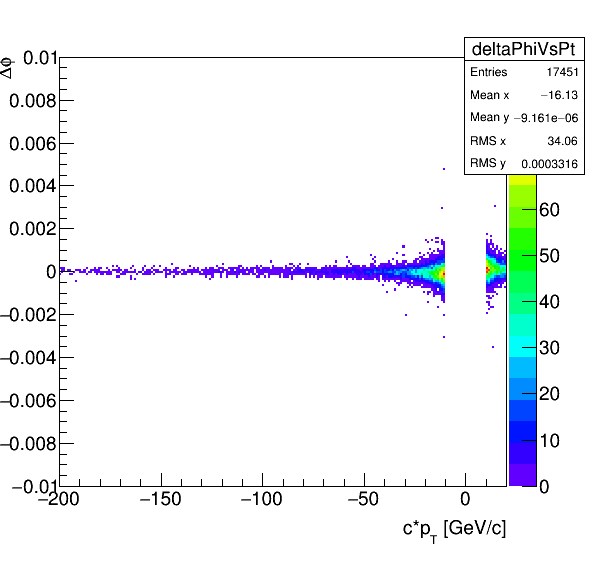

In [66]:
ophi[0]

###cot($\theta$) bias and resolution vs $p_{T}$

In [67]:
ophi = fit_slices(input_file_name, "deltaCotThetaVsPt", pt_bin_edge, pt_min, pt_max, total_bins,
                  min_x_eta, max_x_eta, 0., 0.05,
                  "c*p_{T} [GeV/c]", "#Deltacot(#theta) [cm]", "cot(#theta) resolution [cm]")
ophi[2]

AttributeError: 'TObject' object has no attribute 'SetTitle'

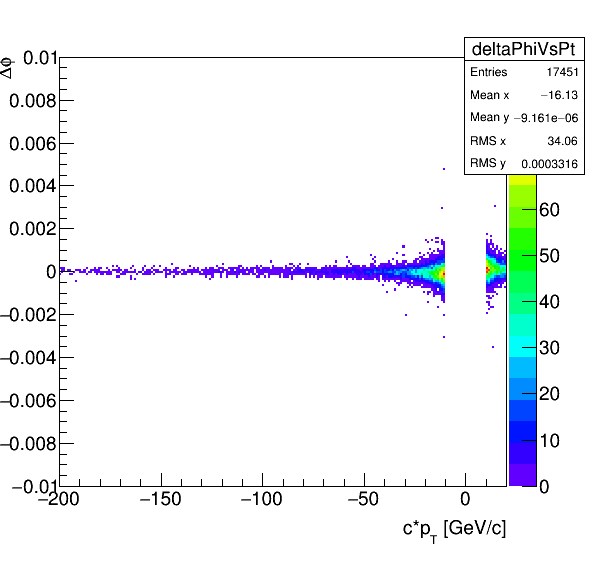

In [68]:
ophi[0]

### $p_{T}$ relative bias and resolution vs $\eta$

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c1
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c2
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: Resolutions


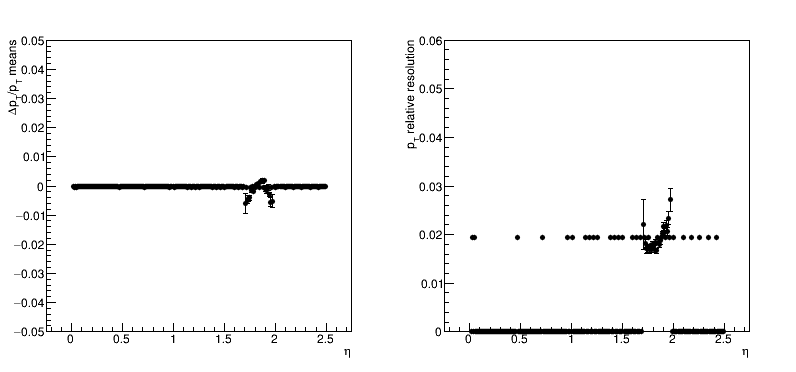

In [70]:
# Note: the bins should be changed from 100 to 400 at some point.
ophi = fit_slices(input_file_name, "deltaPtOverPtVsEta", eta_bin_edge, eta_min, eta_max, 500,
#                  min_x, max_x, 0., 0.04,
                  min_x, max_x, 0., 0.06,
                  "#eta", "#Deltap_{T}/p_{T}", "p_{T} relative resolution")
ophi[2]

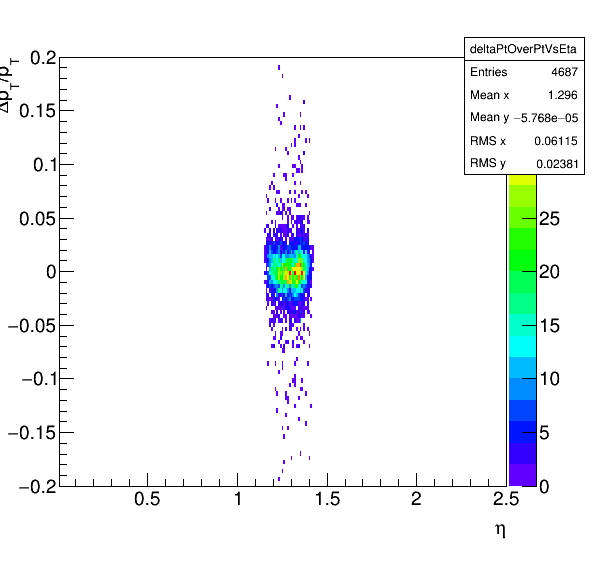

In [32]:
ophi[0]

In [33]:
# ophi[1]

### $\phi$ bias and resolution vs $\eta$

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c1
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c2
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: Resolutions


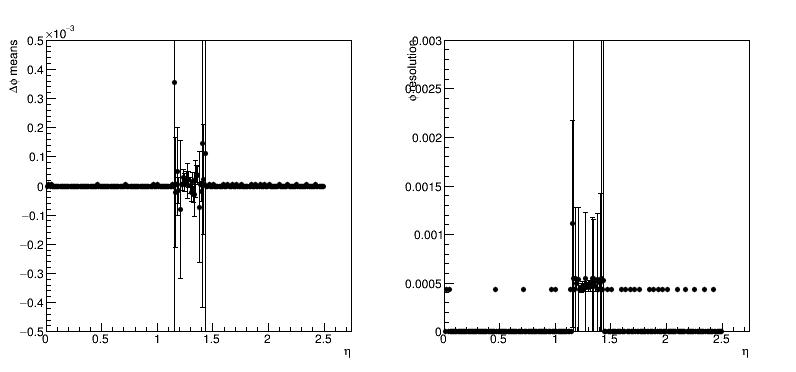

In [34]:
ophi = fit_slices(input_file_name, "deltaPhiVsEta", eta_bin_edge, eta_min, eta_max, 500, 0.5*min_x_phi, 0.5*max_x_phi,
                  0., 0.003,
                  "#eta", "#Delta#phi", "#phi resolution")
ophi[2]

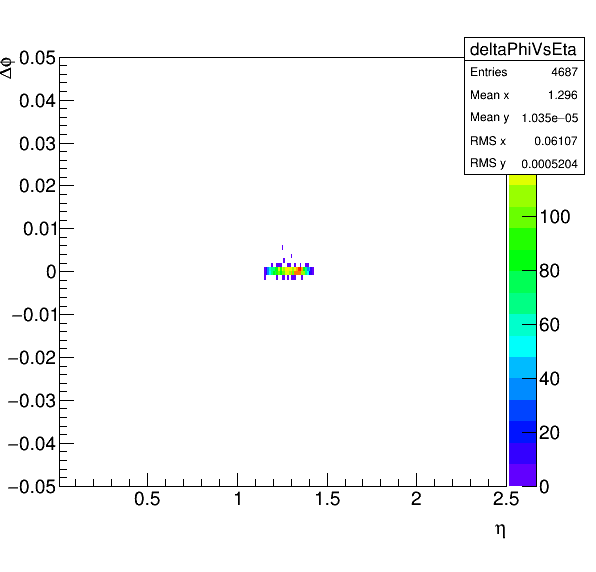

In [35]:
ophi[0]

##$d_{0}$ bias and resolution

In [36]:
od0 = fit_slices(input_file_name, "deltaD0VsPt", pt_bin_edge, pt_min, pt_max, 400,
                 min_x, max_x, 0., 0.1,
#                 2*min_x, 2*max_x, 0., 0.3,
                 "p_{T} [GeV/c]", "#Deltad_{0} [cm]", "d_{0} resolution [cm]")
od0[2]

AttributeError: 'TObject' object has no attribute 'SetTitle'

In [37]:
od0[1]

NameError: name 'od0' is not defined

In [254]:
od0[0]

NameError: name 'od0' is not defined

###$p_{T}$ vs $d_{0}$

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c1
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c2
TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: Resolutions


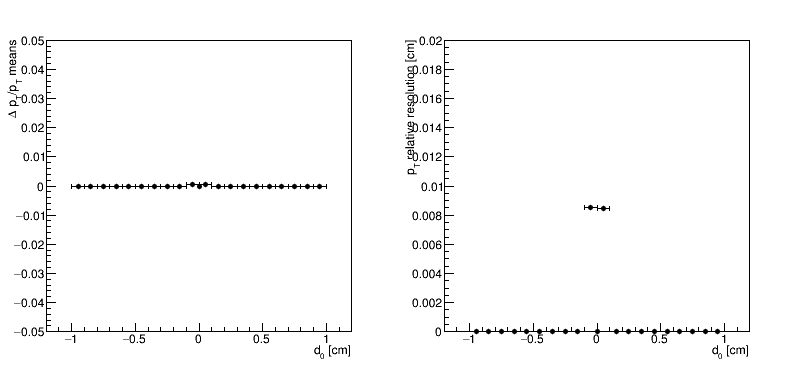

In [255]:
total_bins_d0 = 200
d0_min = -1.
d0_max = 1.
min_x_d0 = -0.1
max_x_d0 = 0.1
d0_bin_edge = [n/10. for n in range(int(d0_min*10), int(d0_max*10)+1)]


od0 = fit_slices(input_file_name, "deltaPtOverPtVsD0", d0_bin_edge, d0_min, d0_max, total_bins_d0,
                  min_x, max_x, 0., 0.02,
#                  min_x, max_x, 0., 0.1,
                  "d_{0} [cm]", "#Delta p_{T}/p_{T}", "p_{T} relative resolution [cm]")
od0[2]

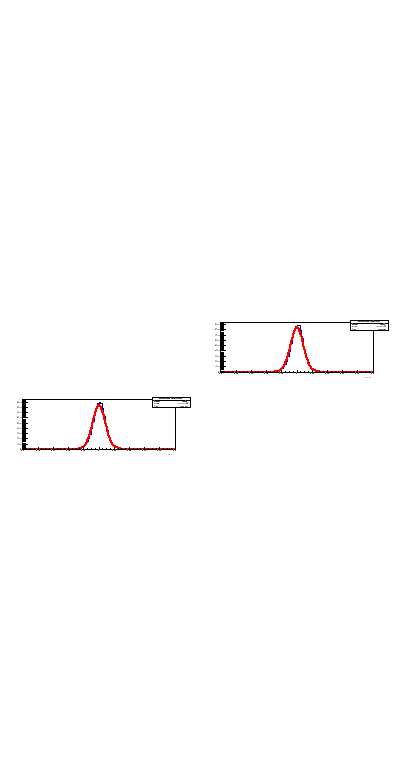

In [256]:
od0[1]

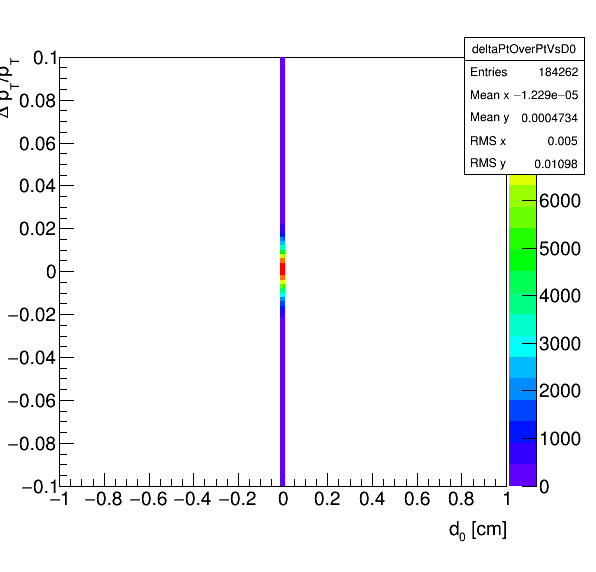

In [257]:
od0[0]

###$d_{0}$ vs $d_{0}$

In [258]:
od0 = fit_slices(input_file_name, "deltaD0VsD0", d0_bin_edge, d0_min, d0_max, 200,
                 10*min_x, 10*max_x, 0., 0.1,
#                 10*min_x, 10*max_x, 0., 0.5,
                 "d_{0} [cm]", "#Delta d_{0} [cm]", "d_{0} resolution [cm]")
od0[2]

AttributeError: 'TObject' object has no attribute 'SetTitle'

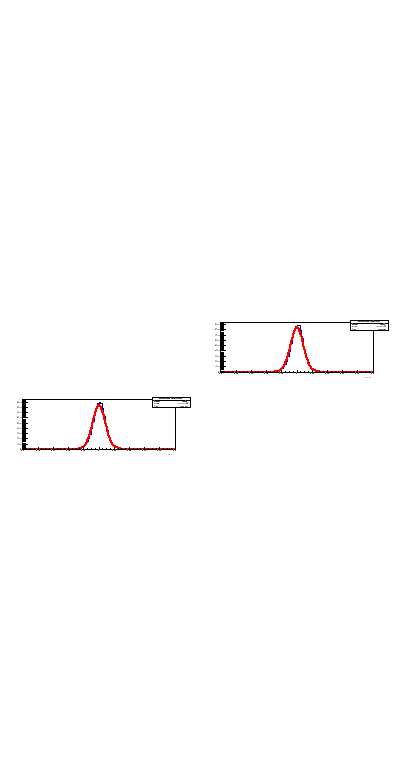

In [259]:
od0[1]

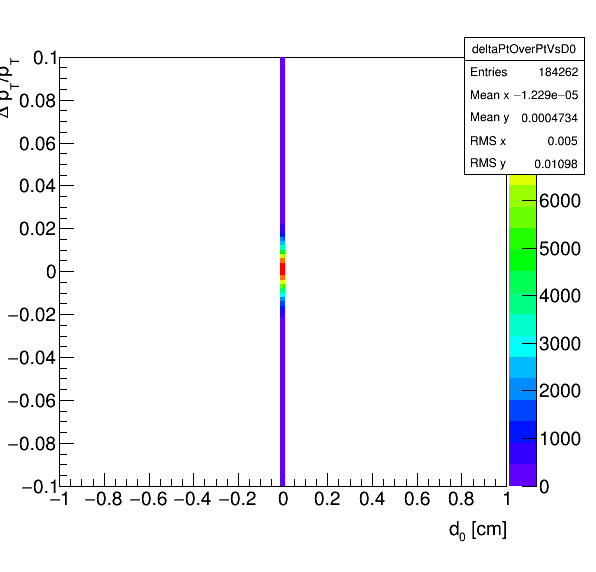

In [260]:
od0[0]

##$\phi$ Bias and Resolution vs $d_{0}$

In [425]:
ophi = fit_slices(input_file_name, "deltaPhiVsD0", d0_bin_edge, d0_min, d0_max, 200,
#                   min_x_phi, max_x_phi, 0., 0.002,
                   10*min_x_phi, 10*max_x_phi, 0., 0.01,
                  "d_{0} [cm]", "#Delta#phi", "#Delta#phi sigmas")
ophi[2]

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c1


ReferenceError: attempt to access a null-pointer

In [426]:
ophi[1]

None

In [427]:
ophi[0]

None

##$d_{0}$ Bias and Resolution vs $\phi$

In [428]:
total_bins_phi = 400
# phi_min = 0.
# phi_max = 0.8
phi_min = -3.14
phi_max = 3.14
# phi_bin_edge = [n/100. for n in range(int(phi_min*100), int(phi_max*100)+1)]
phi_bin_edge = [n/10. for n in range(int(phi_min*10), int(phi_max*10)+1)]
od0 = fit_slices(input_file_name, "deltaD0VsPhi", phi_bin_edge, phi_min, phi_max, total_bins_phi,
#                 min_x_phi, max_x_phi, 0., 0.05,
#                  200*min_x_phi, 200*max_x_phi, 0., 0.5,
                  5*min_x_phi, 5*max_x_phi, 0., 0.05,
                 "#phi [rad]", "#Delta d_{0} [cm]", "d_{0} resolution [cm]")
od0[2]

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c1


ReferenceError: attempt to access a null-pointer

In [429]:
od0[0]

None

$\phi = \phi_0 - \mbox{arcsin}\left(\frac{R}{2\rho}\right)$

$\phi \simeq \phi_0 - \left(\frac{R}{2\rho}\right) - \frac16\left(\frac{R}{2\rho}\right)^3$

$\phi' = \phi + \frac{R - R'}{2\rho} + \frac16\left(\frac{R}{2\rho}\right)^3$

$z \simeq z_{0} + R\cdot\cot\theta + \frac{1}{24}\frac{R^3}{\rho^2}\cot\theta$

$z' = z - \left(R-R' + \frac{1}{24}\frac{R^3}{\rho^2}\right)\cot\theta$

##1/Pz Bias and Resolution

In [430]:
o = fit_slices(input_file_name, "deltaPzOverPzVsPz", pt_bin_edge, pt_min, pt_max, total_bins, min_x, max_x, 0., 0.2,
               "c*p_{z} [GeV/c]", "#Delta p_{z}/p_{z}", "p_{z} resolution / p_{z}")

o[2]

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c1


ReferenceError: attempt to access a null-pointer

In [431]:
ophi = fit_slices(input_file_name, "deltaPzOverPzVsEta", eta_bin_edge, eta_min, eta_max, 500,
                  min_x, max_x, 0., 0.1,
                  "#eta", "#Deltap_{z}/p_{z}", "p_{z} relative resolution")
ophi[2]

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c1


ReferenceError: attempt to access a null-pointer

In [432]:
p1 = (0.8011218584666692, 0.7806726011268028, -0.4580003391942949,
      0.8154098095918906, 2.403558021795071, -4.341816039444899)

p2 = (1.094420656412059, -0.0351059779287913, -0.3012850394844819,
      0.3750653855429497, 1.002260424975083, -1.134827247631327)

In [433]:
p11 = (2.577822510655389, -0.5577868766465199, 1.447995502344507,
       0.7093984774699404, -5.985922429037098, 1.808959130735879)
p21 = (0.872190954649759, 0.9063933077180197, 0.2423671747271533,
       -1.039890343856892, -0.2648719674813415, 0.2836447718476091)

In [434]:
for i in range(len(p1)):
    print p1[i]/p11[i]

print ""
    
for i in range(len(p2)):
    print p2[i]/p21[i]

0.310774638345
-1.399589402
-0.316299559255
1.14943834176
-0.401535110134
-2.40017364996

1.25479477926
-0.0387315061021
-1.24309341735
-0.360677823156
-3.78394299142
-4.00087489799


In [435]:
p12 = (3.246354239256722, 1.299425516536766, 0.8657178535810635,
       -6.465286438227688, 0.4838183250371889, 0.5703342836853535)
p22 = (1.980361044721573, -0.5613602632967232, 0.2718933565120522,
       -0.9423104993484825, 0.06693226930136592, 0.1838072320234546)

In [436]:
for i in range(len(p1)):
    print p1[i]/p12[i]

print ""
    
for i in range(len(p2)):
    print p2[i]/p22[i]

0.246775859756
0.600782877658
-0.529041115763
-0.126121219436
4.96789372666
-7.6127565248

0.552636934224
0.0625373404997
-1.10810004095
-0.398027386729
14.9742483773
-6.174007601
